In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn
seaborn.set(style="white", context="notebook", font_scale=1.5, 
            rc={"axes.grid": True, "legend.frameon": False,
"lines.markeredgewidth": 1.4, "lines.markersize": 10})
seaborn.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 4.5})

#seaborn.set(style="ticks", context="talk")
plt.style.use("dark_background")
seaborn.set_style({'grid.color': '.4'})

#seaborn.set_style("darkgrid")


from sklearn.metrics import mean_squared_error
from collections import OrderedDict


# Regression 1D

##  Data preperation.
From Mehta's notebook 4.

In [2]:
import numpy as np
import scipy.sparse as sp
np.random.seed(12)


import warnings
#Comment this to turn on warnings
warnings.filterwarnings('ignore')

### define Ising model aprams
# system size
L=40

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J=np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L]-=1.0
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies
energies=ising_energies(states,L)

In [3]:
# All possible spin combinations
# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states)
shape=states.shape
states=states.reshape((shape[0],shape[1]*shape[2]))
# build final data set
Data=[states,energies]

## Train

In [4]:
# define number of samples
n_samples=400
# define train and test data sets
X_train=Data[0][:n_samples]
Y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
X_test=Data[0][n_samples:3*n_samples//2]
Y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])

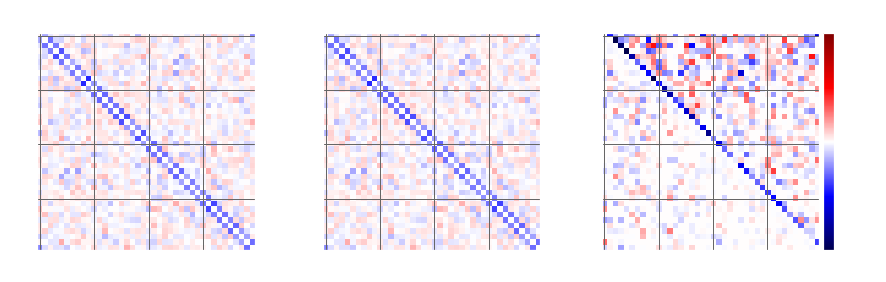

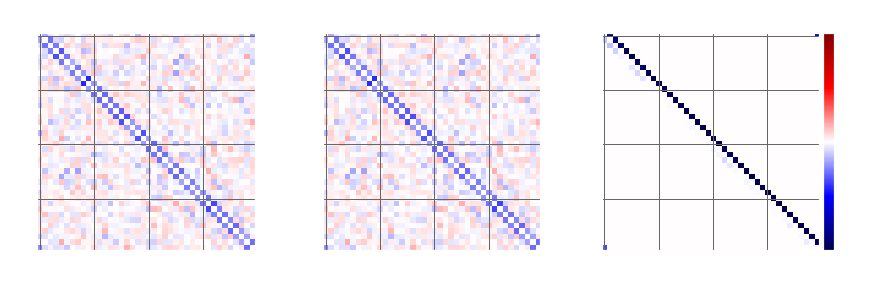

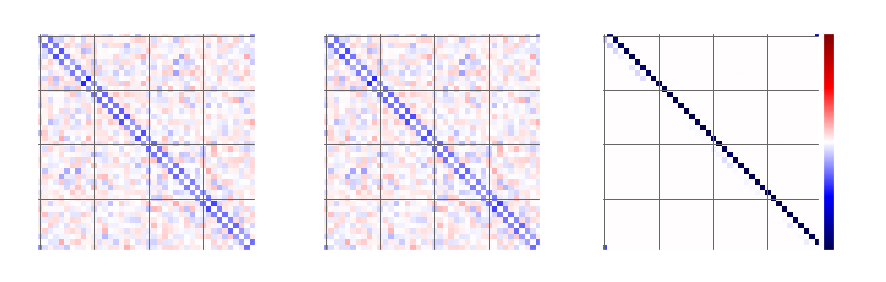

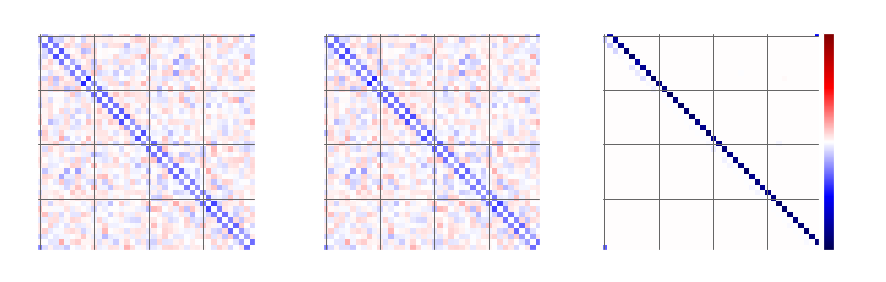

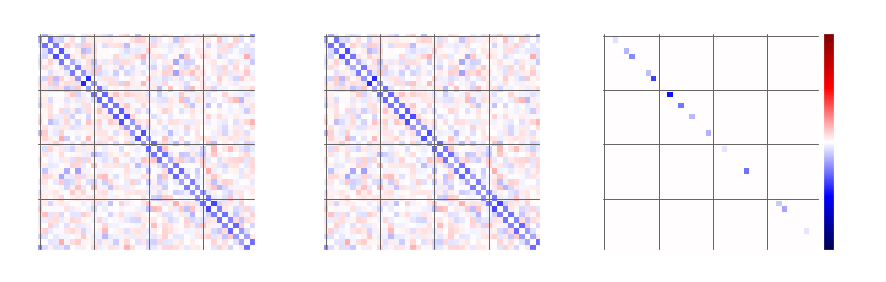

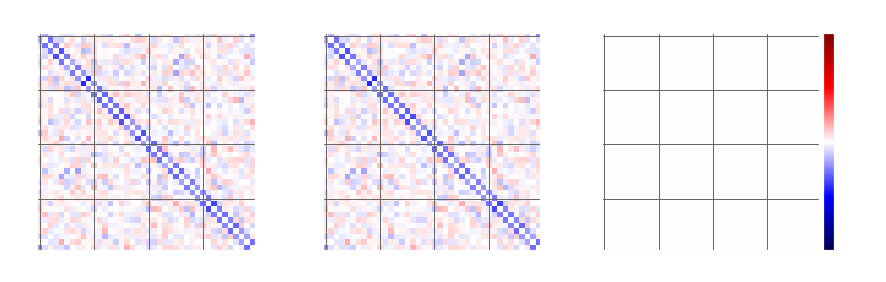

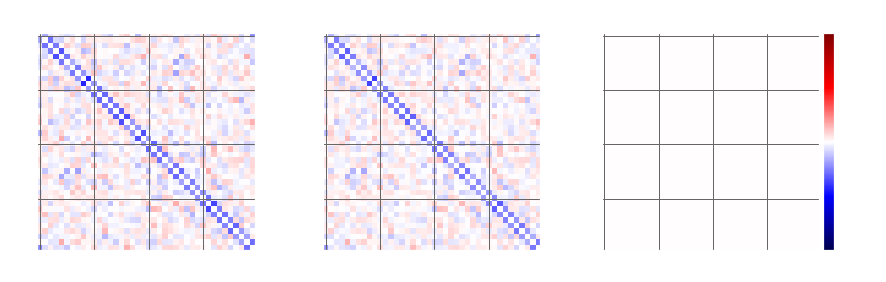

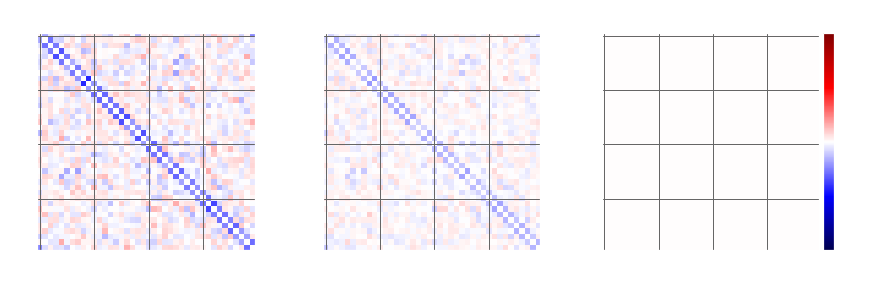

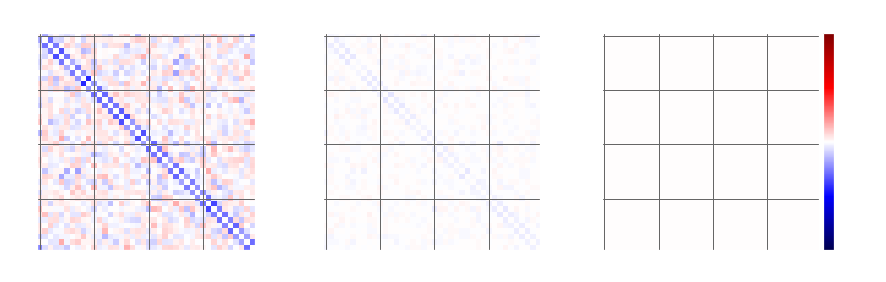

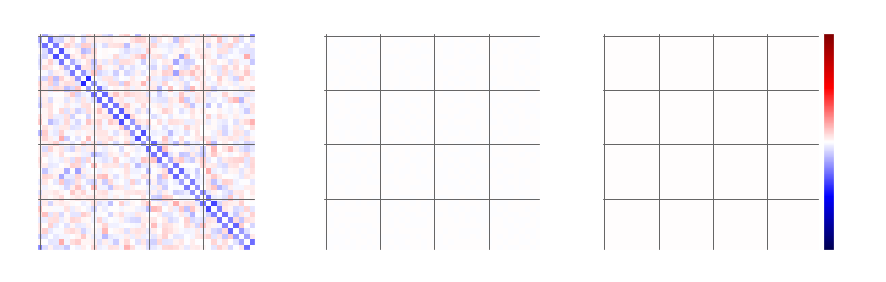

In [5]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn
%matplotlib inline

# set up Lasso and Ridge Regression models
leastsq=linear_model.LinearRegression()
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()

# define error lists
train_errors_leastsq = []
test_errors_leastsq = []
train_mse_leastsq = []
test_mse_leastsq = []

train_errors_ridge = []
test_errors_ridge = []
train_mse_ridge = []
test_mse_ridge = []

train_errors_lasso = []
test_errors_lasso = []
train_mse_lasso = []
test_mse_lasso = []

# set refularisations trength values
lmbdas = np.logspace(-4, 5, 10)

#Initialize coeffficients for ridge regression and Lasso
coefs_leastsq = []
coefs_ridge = []
coefs_lasso=[]

for lmbda in lmbdas:
    
    ### ordinary least squares
    leastsq.fit(X_train, Y_train) # fit model 
    coefs_leastsq.append(leastsq.coef_) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_leastsq.append(leastsq.score(X_train, Y_train))
    test_errors_leastsq.append(leastsq.score(X_test,Y_test))
    train_mse_leastsq.append(mean_squared_error(Y_train, leastsq.predict(X_train)))
    test_mse_leastsq.append(mean_squared_error(Y_test, leastsq.predict(X_test)))
    
    ### apply Ridge regression
    ridge.set_params(alpha=lmbda) # set regularisation parameter
    ridge.fit(X_train, Y_train) # fit model 
    coefs_ridge.append(ridge.coef_) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, Y_train))
    test_errors_ridge.append(ridge.score(X_test,Y_test))
    train_mse_ridge.append(mean_squared_error(Y_train, ridge.predict(X_train)))
    test_mse_ridge.append(mean_squared_error(Y_test, ridge.predict(X_test)))
    
    ### apply Ridge regression
    lasso.set_params(alpha=lmbda) # set regularisation parameter
    lasso.fit(X_train, Y_train) # fit model
    coefs_lasso.append(lasso.coef_) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_lasso.append(lasso.score(X_train, Y_train))
    test_errors_lasso.append(lasso.score(X_test,Y_test))
    train_mse_lasso.append(mean_squared_error(Y_train, lasso.predict(X_train)))
    test_mse_lasso.append(mean_squared_error(Y_test, lasso.predict(X_test)))

    ### plot Ising interaction J
    J_leastsq=np.array(leastsq.coef_).reshape((L,L))
    J_ridge=np.array(ridge.coef_).reshape((L,L))
    J_lasso=np.array(lasso.coef_).reshape((L,L))

    cmap_args=dict(vmin=-1., vmax=1., cmap='seismic')

    fig, axarr = plt.subplots(nrows=1, ncols=3)
    
    axarr[0].imshow(J_leastsq,**cmap_args)
    axarr[0].set_title('$\\mathrm{OLS}$',fontsize=16)
    axarr[0].tick_params(labelsize=16)
    
    axarr[1].imshow(J_ridge,**cmap_args)
    axarr[1].set_title('$\\mathrm{Ridge},\ \\lambda=%.4f$' %(lmbda),fontsize=16)
    axarr[1].tick_params(labelsize=16)
    
    im=axarr[2].imshow(J_lasso,**cmap_args)
    axarr[2].set_title('$\\mathrm{LASSO},\ \\lambda=%.4f$' %(lmbda),fontsize=16)
    axarr[2].tick_params(labelsize=16)
    
    divider = make_axes_locatable(axarr[2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(im, cax=cax)
    
    cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)
    cbar.set_label('$J_{i,j}$',labelpad=-40, y=1.12,fontsize=16,rotation=0)
    
    fig.subplots_adjust(right=2.0)
    
    plt.show()

The OLS estimation seems to have largest values along the nearest diagnaol points to the diagonal, which represents the neigboiring spins. It is good that the OLS estimator gives largst coefficients along the these neigbouring diagonals, since the data was created by only neighbouring spins. <br>

The weights equal around -0.5 for Ridge and Lasso. This reflects the fact that each weight takes in two symmetric parts, e.g. $J_{j, j-1}$ and $J_{j, j+1}$ and the weights are distributed equally between these terms. Hence we have -1 on the digiagonal, or more precisely, on the nearest neigbour diagonals to the main diagonal. <mark> Imrpove! See Methta p.25. <br>
    
## Performance
Lasso is the model that gives the best fit, since it, for a sufficiently large $\lambda$, is able to remove the insignifican parameters.

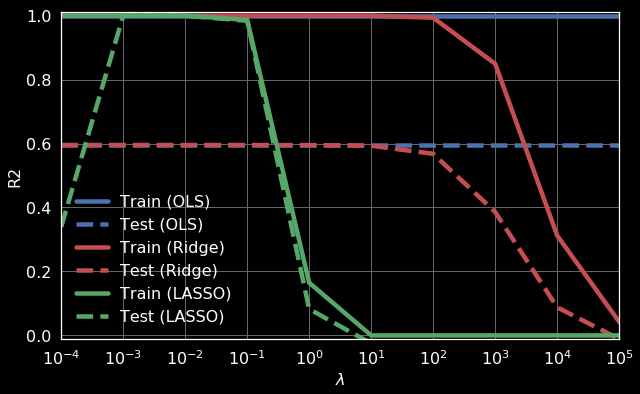

In [11]:
# Plot our performance on both the training and test data
plt.semilogx(lmbdas, train_errors_leastsq, 'b',label='Train (OLS)')
plt.semilogx(lmbdas, test_errors_leastsq,'--b',label='Test (OLS)')
plt.semilogx(lmbdas, train_errors_ridge,'r',label='Train (Ridge)')#,linewidth=1)
plt.semilogx(lmbdas, test_errors_ridge,'--r',label='Test (Ridge)')#,linewidth=1)
plt.semilogx(lmbdas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(lmbdas, test_errors_lasso, '--g',label='Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left',fontsize=16)
plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('R2',fontsize=16)
plt.tick_params(labelsize=16)
#plt.palette="pastel"
plt.show()

__Figure x:__ R2 scores. Test and training. All models. Regression. 1D. <br>
_There is a maximum $\lambda$ for both Ridge and Lasso. At some $lambda$ both the Ridge and the Lasso model starts doing worse._ <br>

The optimal $\lambda$ is around $10^{-2}$ for Lasso and $10$ for Ridge. The optima are found where the test performance peaks. <br>

Lets take a look at the MSEs.

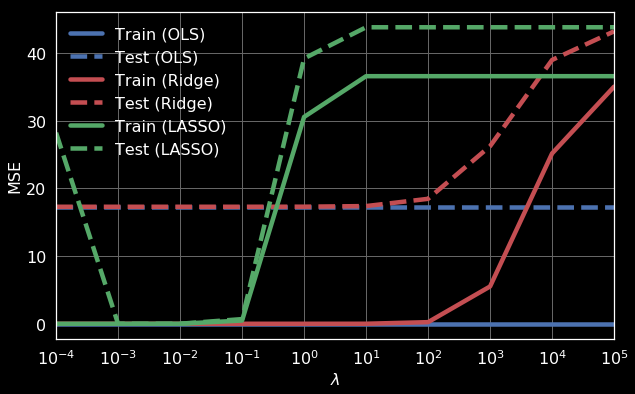

In [12]:
# Plot our performance on both the training and test data
plt.semilogx(lmbdas, train_mse_leastsq, 'b',label='Train (OLS)')
plt.semilogx(lmbdas, test_mse_leastsq,'--b',label='Test (OLS)')
plt.semilogx(lmbdas, train_mse_ridge,'r',label='Train (Ridge)')#,linewidth=1)
plt.semilogx(lmbdas, test_mse_ridge,'--r',label='Test (Ridge)')#,linewidth=1)
plt.semilogx(lmbdas, train_mse_lasso, 'g',label='Train (LASSO)')
plt.semilogx(lmbdas, test_mse_lasso, '--g',label='Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper left',fontsize=16)
#plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('MSE',fontsize=16)
plt.tick_params(labelsize=16)
#plt.palette="pastel"
plt.show()

__Figure X:__ MSE. Test and training. All models. Regression. 1D. <br>
_The story is the same as for the R2-score: There are critical $\lambda$'s for which the test MSE of Ridge and Lasso start to increase. The critical $\lambda$'s are the same as for the R2-score._

## Bias-variance decomposition

In [51]:
from collections import OrderedDict
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn
%matplotlib inline

def bootstrap(xData, yData,  R, lmbda):
    n = xData.shape[0] 
    inds = np.arange(n); 

    mseMatrixUnknownF =  OrderedDict()
    sdMatrixUnknownF =  OrderedDict()
    bias2MatrixUnknownF =  OrderedDict()
    totalMatrixUnknownF =  OrderedDict()
    residualDictUnknownF = OrderedDict()
    
    models = ['ridge', 'lasso']
    
    for i in models:
        mseMatrixUnknownF[i] = np.zeros(n)
        sdMatrixUnknownF[i] = np.zeros(n)
        bias2MatrixUnknownF[i] = np.zeros(n)
        totalMatrixUnknownF[i] = np.zeros(n)
        residualDictUnknownF[i] = OrderedDict()
        for j in range(n):
            residualDictUnknownF[i][j] = []    
                                                                                                                                        
    for i in range(R):
        idxTrain = np.random.randint(0,n,n)
        idxValid = np.setdiff1d(np.union1d(inds, idxTrain ), np.intersect1d(inds, idxTrain))
        
        x_train = xData[idxTrain]
        y_train = yData[idxTrain]
        x_valid = xData[idxValid]
        y_valid = yData[idxValid]
        
        ridge.set_params(alpha=lmbda) # set regularisation parameter
        ridge.fit(x_train, y_train) # fit model
        yPredictRidge = ridge.predict(x_valid)
        
         
        lasso.set_params(alpha=lmbda) # set regularisation parameter
        lasso.fit(x_train, y_train) # fit model
        yPredictLasso = lasso.predict(x_valid)
        
        for i in range(len(idxValid)):
            residualDictUnknownF[models[0]][i].append(y_valid[i] -yPredictRidge[i])
            residualDictUnknownF[models[1]][i].append(y_valid[i] -yPredictLasso[i])
            
    mseUnknownF = OrderedDict()
    sdUnknownF = OrderedDict()
    bias2UnknownF = OrderedDict()
    totalUnknownF = OrderedDict()
        
    for model in models:
        for i in range(n):
            mseMatrixUnknownF[model][i] = np.mean([(residualDictUnknownF[model][i][j])**2 for j in range(len(residualDictUnknownF[model][i]))])#np.mean( (residualDictUnknownF[key])**2 )
            sdMatrixUnknownF[model][i] = np.var( residualDictUnknownF[model][i] )
            bias2MatrixUnknownF[model][i] = ( np.mean(residualDictUnknownF[model][i]) )**2
            totalMatrixUnknownF[model][i] = sdMatrixUnknownF[model][i] + \
    bias2MatrixUnknownF[model][i]
        mseUnknownF[model] = np.nanmean(mseMatrixUnknownF[model])
        sdUnknownF[model] = np.nanmean(sdMatrixUnknownF[model])
        bias2UnknownF[model] = np.nanmean(bias2MatrixUnknownF[model])
        totalUnknownF[model] = np.nanmean(totalMatrixUnknownF[model])
            
    return mseUnknownF, sdUnknownF, bias2UnknownF, totalUnknownF

leastsq=linear_model.LinearRegression()
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()
lmbdas = np.logspace(-4, 5, 10)
R = 50
xData = X_train
yData = Y_train
mses, sds, biases, totals = [], [], [], []
for lmbda in lmbdas:
    mseUnknownF, sdUnknownF, bias2UnknownF, totalUnknownF = bootstrap(xData, yData,  R, lmbda)   
    mses.append(mseUnknownF)
    sds.append(sdUnknownF)
    biases.append(bias2UnknownF)
    totals.append(totalUnknownF)
#print(mseUnknownF, sdUnknownF, bias2UnknownF, totalUnknownF)


In [52]:
msePlot = OrderedDict()
varPlot = OrderedDict()
biasPlot = OrderedDict()
totalPlot = OrderedDict()

models = ['ridge', 'lasso']
for model in models:
    msePlot[model] = []
    varPlot[model] = []
    biasPlot[model] = []
    totalPlot[model] = []


for model in models:
    for i in range(len(mses)):
        msePlot[model].append(mses[i][model])
        varPlot[model].append(sds[i][model])
        biasPlot[model].append(biases[i][model])
        totalPlot[model].append(totals[i][model])

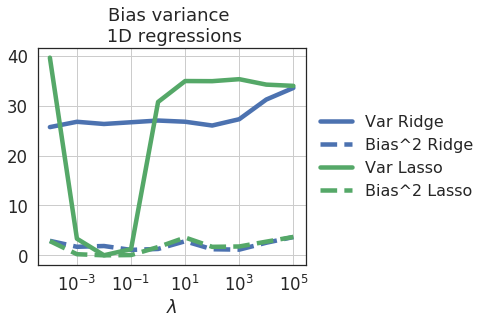

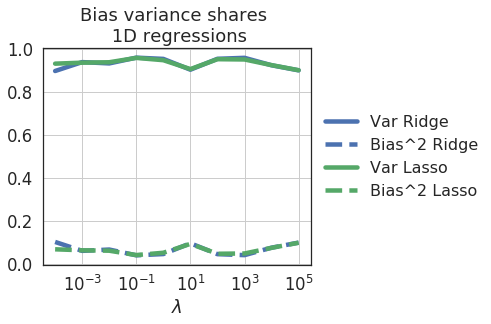

In [57]:
#print(mseUnknownF, sdUnknownF, bias2UnknownF, totalUnknownF)
fig, ax = plt.subplots()
ax.semilogx(lmbdas, varPlot[models[0]], 'b',label='Var Ridge')
ax.semilogx(lmbdas, biasPlot[models[0]], '--b',label='Bias^2 Ridge')
ax.semilogx(lmbdas, varPlot[models[1]], 'g',label='Var Lasso')
ax.semilogx(lmbdas, biasPlot[models[1]], '--g',label='Bias^2 Lasso')
ax.set_xlabel(r'$\lambda$')
ax.set_title('Bias variance \n 1D regressions')
#fig.legend(loc='right',fontsize=16)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)\
, fontsize = 16)
plt.show()

fig, ax = plt.subplots()
ax.semilogx(lmbdas, np.array(varPlot[models[0]])/np.array(msePlot[models[0]]), 'b',label='Var Ridge')
ax.semilogx(lmbdas, np.array(biasPlot[models[0]])/np.array(msePlot[models[0]]), '--b',label='Bias^2 Ridge')
ax.semilogx(lmbdas, np.array(varPlot[models[1]])/np.array(msePlot[models[1]]), 'g',label='Var Lasso')
ax.semilogx(lmbdas, np.array(biasPlot[models[1]])/np.array(msePlot[models[1]]), '--g',label='Bias^2 Lasso')
ax.set_xlabel(r'$\lambda$')
ax.set_title('Bias variance shares \n 1D regressions')
#fig.legend(loc='right',fontsize=16)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)\
, fontsize = 16)
plt.show()

__Figure :__ Bias-variance decomposition. Ridge and Lasso. 1D regression. <br>
_It is increased variance that drives the rise of MSE._ <br>

__Figure :__ Bias-variance decopmososion. Shares of MSE. Ridge and Lasso. 1D regression. <br>
_The shares varies little with $\lambda$. The variance makes up almost 90 per cent of the MSE for both models.

When interpreting the above figure, we must keep in min that the smallest $\lambda$'s are overfitting the models. For Lasso we see that the variance comes down as $\lambda$ is increased from the lowest level. This implies that there was overfitting for the lowst $\lambda$'s. The bias for Lasso is farly constant, reflecting that the average error does not vary much with $\lambda$. When restricting the parameters a lot, the Lasso model again becomes sensitive to the training set used. At $\lambda=10^{-1}$ there is a jump in the variance for Lasso. <br>

For Ridge everything is pretty constant up to $\lambda=10^3$. At $\lambda = 10^{3}$ the variance of Ridge starts to increase, reflecting that Ridge model becomes sensitive to the training data. A small change in training data gives very different models. We had expected also the Ridge model to have a higher variance for the lowest $\lambda$, as Lasso did, since we are overfitting at low levels of $\lambda$. Perhaps even smaller levels of $\lambda$ would be necessary for Ridge to have a higher starting variance.

# Logistic regression

Logistic regression class.

In [10]:
class LogisticRegressionC:
    def __init__(self, xData, yData):
        self.xData, self.yData = xData, yData
        self.features = np.shape(self.xData)[1] 
        
    def createDesignMatrix(self):
        self.XHat = np.c_[np.ones(np.shape(self.xData)[0]), self.xData]
        
    def sigmoid(self, z):
        self.sigmoidOutput = 1./(1. + np.exp(-z))
        
    def gradientDescent(self, iterations = 1000, tolerance = 1e-8, eta=0.1):
        self.betaHat = np.random.random(self.features + 1) - .5
        iteration = 1
        gradient = 10
        while (iteration < iterations and np.linalg.norm(gradient) > tolerance):
            self.sigmoid(self.XHat @ self.betaHat)
            pHat = self.sigmoidOutput            
            gradient = -self.XHat.T @ (self.yData - pHat)# / self.yData.size # Depends if 1/m in cost-f
            self.betaHat -= eta*gradient
            iteration += 1
        
    def stochasticGradientDescent(self,tolerance = 1e-8, n_epochs=50,t0=5, t1 = 50,\
                                 m = 100):
        """ From Hjorth-Jensen's ML lecture notes"""
        
        def learning_schedule(t):
            return t0/(t+t1)

        self.betaHat = np.random.random(self.features + 1) - .5

        for epoch in range(n_epochs):
            for i in range(m):
                random_index = np.random.randint(m)
                xi = self.XHat[random_index:random_index+1]
                yi = self.yData[random_index:random_index+1]
                self.sigmoid(self.XHat @ self.betaHat)
                pHat = self.sigmoidOutput            
                gradients = -self.XHat.T @ (self.yData - pHat)
                eta = learning_schedule(epoch*m+i)
                self.betaHat -= eta*gradients
                
                
    def stochasticGradientDescent2(self, nEpochs=50, batchSize=20,t0=5, t1 = 50):
        """ Modified version of MHJ's version in MHJ's lecture notes """
        
        def learning_schedule(t):
            return t0/(t+t1)
        
        observations = len(self.yData)
        cost_history = np.zeros(nEpochs)
        n_batches = int(observations/batchSize)

        self.betaHat = np.random.random(self.features + 1) - .5
        
        costBest = 1e9
        for epoch in range(nEpochs):
            cost =0.0
            indices = np.random.permutation(observations)
            X = self.xData[indices]
            y = self.yData[indices]
            for i in range(0,observations,batchSize):
                X_i = X[i:i+batchSize]
                y_i = y[i:i+batchSize]
                
                X_i = np.c_[np.ones(len(X_i)),X_i]
                self.sigmoid(X_i @ self.betaHat)
                pHat = self.sigmoidOutput            
                gradients = -X_i.T @ (y_i - pHat)
                eta = learning_schedule(epoch*n_batches+i)
                self.betaHat -= eta*gradients
                cost += self.calculateCost(X_i,y_i)
            cost_history[epoch]  = cost
            if cost_history[epoch] < costBest:
                costBest = cost
                betaBest = self.betaHat
        return self.betaHat, cost_history, betaBest
    
    def calculateCost(self, X, y):
        " Cross entropy"
        term1 = X @ self.betaHat
        term2 = np.log(1 + np.exp(X @ self.betaHat))
        ce = 0
        for i in range(len(y)):
            ce -= (y[i]*term1[i] - term2[i]) 
        return ce
                
            
    def predict(self, X):
        self.xData = X
        self.createDesignMatrix()
        self.sigmoid(self.XHat @ self.betaHat)
        return self.sigmoidOutput
        
        
    def predictHard(self, X, threshold = .5):
        prediction = self.predict(X)
        #self.predict(X)
        #prediction = self.sigmoidOutput
        return prediction >= threshold
    
    
    def bootstrap(self, xData, yData,  R):
        n = xData.shape[0] 
        inds = np.arange(n); 

        mseMatrixUnknownF =  OrderedDict()
        sdMatrixUnknownF =  OrderedDict()
        bias2MatrixUnknownF =  OrderedDict()
        totalMatrixUnknownF =  OrderedDict()
        residualDictUnknownF = OrderedDict()

        mseMatrixUnknownF = np.zeros(n)
        sdMatrixUnknownF = np.zeros(n)
        bias2MatrixUnknownF = np.zeros(n)
        totalMatrixUnknownF = np.zeros(n)
        residualDictUnknownF = OrderedDict()
        for j in range(n):
            residualDictUnknownF[j] = []    

        for i in range(R):
            idxTrain = np.random.randint(0,n,n)
            idxValid = np.setdiff1d(np.union1d(inds, idxTrain ), np.intersect1d(inds, idxTrain))

            x_train = xData[idxTrain]
            y_train = yData[idxTrain]
            x_valid = xData[idxValid]
            y_valid = yData[idxValid]
            
            self.xData = xData
            self.yData = yData
            self.createDesignMatrix()
            betaHat, cost_history, betaBest = \
            stochasticGradientDescent2(self, nEpochs=50, batchSize=20,t0=5, t1 = 50)
            self.sigmoid(self.XHat @ self.betaHat)

            for i in range(len(idxValid)):
                residualDictUnknownF[i].append(y_valid[i] -self.sigmoidOutput[i])

        mseUnknownF = OrderedDict()
        sdUnknownF = OrderedDict()
        bias2UnknownF = OrderedDict()
        totalUnknownF = OrderedDict()

        for i in range(n):
            mseMatrixUnknownF[i] = np.mean([(residualDictUnknownF[j])**2 for j in range(len(residualDictUnknownF[model][i]))])#np.mean( (residualDictUnknownF[key])**2 )
            sdMatrixUnknownF[i] = np.var( residualDictUnknownF[i] )
            bias2MatrixUnknownF[i] = ( np.mean(residualDictUnknownF[i]) )**2
            totalMatrixUnknownF[i] = sdMatrixUnknownF[i] + \
        bias2MatrixUnknownF[i]
        mseUnknownF = np.nanmean(mseMatrixUnknownF)
        sdUnknownF = np.nanmean(sdMatrixUnknownF)
        bias2UnknownF = np.nanmean(bias2MatrixUnknownF)
        totalUnknownF = np.nanmean(totalMatrixUnknownF)

        return mseUnknownF, sdUnknownF, bias2UnknownF, totalUnknownF
'''
np.random.seed(1)
xdata = np.random.randint(10, size=(4,2))
ydata = np.random.randint(10, size=4)

lr = LogisticRegressionC(xdata, ydata)
lr.createDesignMatrix()
lr.XHat
#print(lr.XHat)
lr.gradientDescent(iterations=100)
lr.betaHat

xNew = np.random.randint(3, size=(3,2))
lr.xData = xNew
lr.createDesignMatrix()

lr.predict()
lr.predict
'''

'\nnp.random.seed(1)\nxdata = np.random.randint(10, size=(4,2))\nydata = np.random.randint(10, size=4)\n\nlr = LogisticRegressionC(xdata, ydata)\nlr.createDesignMatrix()\nlr.XHat\n#print(lr.XHat)\nlr.gradientDescent(iterations=100)\nlr.betaHat\n\nxNew = np.random.randint(3, size=(3,2))\nlr.xData = xNew\nlr.createDesignMatrix()\n\nlr.predict()\nlr.predict\n'

Sci-kit example from https://compphysics.github.io/MachineLearning/doc/pub/LogReg/html/LogReg.html

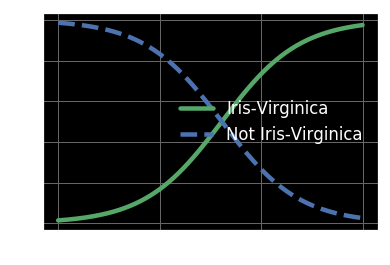

(1000,)


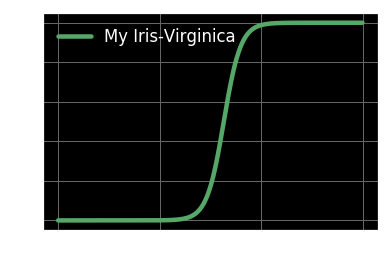

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
['data', 'target_names', 'feature_names', 'target', 'DESCR']
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()
plt.show()

# My class
lr2 = LogisticRegressionC(X, y)
lr2.createDesignMatrix()
#lr2.gradientDescent(iterations=300000,tolerance = 1e-20, eta=0.1)
lr2.stochasticGradientDescent(tolerance = 1e-8, n_epochs=100,t0=5, t1 = 50,\
                                 m = 200)

y_probaMine = lr2.predict(X_new)
print(y_probaMine.shape)
plt.plot(X_new, y_probaMine, "g-", label="My Iris-Virginica")
plt.legend()
plt.show()

Logistic regression class from internet, used for testing of my class.


In [3]:
class LogisticRegressionC2:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=.5):
        return self.predict_prob(X) >= threshold
    
    
model = LogisticRegressionC2(lr=0.1, num_iter=300000)
%time model.fit(X, y)

#CPU times: user 13.8 s, sys: 84 ms, total: 13.9 s
#Wall time: 13.8 s

preds = model.predict(X)
# accuracy
(preds == y).mean()

pred = model.predict_prob(X_new)
print(pred.shape)

fig, (ax,ax2) = plt.subplots(1,2, figsize=(12.5,5))
ax.plot(X_new, pred, "g-", label="Internet class")
#plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
ax2.plot(X_new, y_probaMine/pred, "r-", label="My class/internet class")
ax.legend()
plt.legend()
plt.show()


NameError: name 'X' is not defined

NameError: name 'X' is not defined

Testing mine against internet class on Iris

In [85]:
from sklearn import datasets
iris = datasets.load_iris()
#iris = sklearn.datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

# Internet class
model = LogisticRegressionC2(lr=0.1, num_iter=300000)
%time model.fit(X, y)
preds = model.predict(X)
accuracyInternet = (preds == y).mean()
print('preds Internet', preds)
print('accuracyInternet', accuracyInternet)

# My class
lr2 = LogisticRegressionC(X, y)
lr2.createDesignMatrix()
#lr2.gradientDescent(iterations=300000,tolerance = 1e-20, eta=0.1)
#lr2.stochasticGradientDescent( tolerance = 1e-8, n_epochs=500,t0=5, t1 = 50
 #                                m = 100)
beta, cost, betaBest = lr2.stochasticGradientDescent2(nEpochs=50, batchSize=20,t0=5, t1 = 25)
predsMyModel = lr2.predictHard(X)
accuracyMyModel = (predsMyModel == y).mean()
print('preds MyMOdel', predsMyModel)
print('accuracyMyModel', accuracyMyModel)

CPU times: user 3.74 s, sys: 9 µs, total: 3.74 s
Wall time: 3.75 s
preds Internet [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
accu

In [62]:
np.where((preds == predsMyModel)==0)

(array([41]),)

In [86]:
cost

array([1660.01706019,  724.19845402,  439.39141104,   17.62195199,
         73.12502284,  308.6503989 ,    6.80833136,    6.88876217,
          7.32002468,    6.98259272,    5.7144895 ,    7.16670499,
          7.13042084,    7.03241614,    6.84027376,    6.87974808,
          6.83360744,    6.64662424,    6.46947372,    6.21402453,
          6.61437262,    6.50127148,    6.32908733,    6.14458975,
          6.33908274,    6.64458042,    6.50052318,    6.10614773,
          6.71411216,    6.74828027,    6.0257251 ,    6.10641849,
          6.59621813,    6.03759839,    6.29228465,    6.40803852,
          6.22780941,    6.24683171,    6.61106646,    6.29052192,
          6.54031915,    6.26428078,    6.49535007,    6.43506744,
          6.24015359,    6.42349238,    6.36807509,    6.48835071,
          6.55848737,    6.33843635])

In [87]:
betaBest

array([-1.52345501,  4.80627883, -7.84917782])

Importing data

In [3]:
import pickle,os
import numpy as np

###### define ML parameters
num_classes=2
train_to_test_ratio=0.5 # training samples

# path to data directory
cwd = os.getcwd()
path_to_data=cwd + '/IsingData/'#os.path.expanduser('~')+'IsingData/'

# load data
file_name = "Ising2DFM_reSample_L40_T=All.pkl" # this file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
data = pickle.load(open(path_to_data+file_name,'rb')) # pickle reads the file and returns the Python object (1D array, compressed bits)
data = np.unpackbits(data).reshape(-1, 1600) # Decompress array and reshape for convenience
data=data.astype('int')
data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)

file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl" # this file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
labels = pickle.load(open(path_to_data+file_name,'rb')) # pickle reads the file and returns the Python object (here just a 1D array with the binary labels)

The above gives memory error further down the way.

Try stacking

In [2]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
import os


def read_t(t=0.25,root="./"):
    if t > 0.:
        data = pickle.load(open(root+'Ising2DFM_reSample_L40_T=%.2f.pkl'%t,'rb'))
    else:
        data = pickle.load(open(root+'Ising2DFM_reSample_L40_T=All.pkl','rb'))
    #data[np.where(data==0)]=-1
    #return np.unpackbits(data).astype(int).reshape(-1,1600)
    data = np.unpackbits(data).astype(int).reshape(-1,1600)
    data[np.where(data==0)]=-1
    return data
'''
stack = []
for i,t in enumerate(np.arange(0.25,4.01,0.25)):
    y = np.ones(10000,dtype=int)
    if t > 2.25:
        y*=0
    stack.append(y)

pickle.dump(np.vstack(y),open('labels_all.pkl','wb'))
'''
#X = read_t(-1)
''' for i in range(16):
    print(np.arange(0.25,4.01,0.25)[i])
    x = X[i*10000].reshape(40,40)
    plt.imshow(x)
    plt.show() '''


cwd = os.getcwd()
root=cwd + '/IsingData/'#os.path.expanduser('~')+'IsingData/'
stack = []
labels = np.zeros((10000*13))
#labels = np.zeros((10000*11))
counter = 0
for t in .25, .5, .75, 1., 1.25, 1.5, 1.75, 2.75, 3., 3.25, 3.5, 3.75, 4.0:#np.arange(0.25,4.01,0.25):
#for t in .5, .75, 1., 1.25, 1.5, 1.75, 2.75, 3., 3.25, 3.5, 3.75:
    stack.append(read_t(t, root=root))
    y = np.ones(10000,dtype=int)
    if t > 2.25:
        y*=0

    labels[counter*10000:(counter+1)*10000] = y
    counter += 1
data = np.vstack(stack)
del stack

#pickle.dump(np.packbits(X), open('Ising2DFM_reSample_L40_T=All.pkl','wb')) 

'''
X_ordered=data[:60000,:]
Y_ordered=labels[:60000]


X_disordered=data[60000:,:]
Y_disordered=labels[60000:]

'''
#del data,labels

num_classes=2
train_to_test_ratio=0.5 # training samples
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,labels,train_size=train_to_test_ratio, \
                                              test_size = 1-train_to_test_ratio)

In [3]:
###### apply logistic regression
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier


# define regularisation parameter
lmbdas=np.logspace(-5,5,11)

# preallocate data
train_accuracy=np.zeros(lmbdas.shape,np.float64)
test_accuracy=np.zeros(lmbdas.shape,np.float64)

train_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)
test_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)

# loop over regularisation strength
for i,lmbda in enumerate(lmbdas):

    # define SGD-based logistic regression
    logreg_SGD = linear_model.SGDClassifier(loss='log', penalty='l2', alpha=lmbda, max_iter=100, 
                                           shuffle=True, random_state=1, learning_rate='optimal')

    # fit training data
    logreg_SGD.fit(X_train,Y_train)

    # check accuracy
    train_accuracy_SGD[i]=logreg_SGD.score(X_train,Y_train)
    test_accuracy_SGD[i]=logreg_SGD.score(X_test,Y_test)
    print('accuracy: train, test')
    print('SGD: %0.4f, %0.4f' %(train_accuracy_SGD[i],test_accuracy_SGD[i]) )

    print('finished computing %i/11 iterations' %(i+1))
    




accuracy: train, test
SGD: 0.5077, 0.4919
finished computing 1/11 iterations
accuracy: train, test
SGD: 0.5011, 0.4791
finished computing 2/11 iterations
accuracy: train, test
SGD: 0.7215, 0.6838
finished computing 3/11 iterations
accuracy: train, test
SGD: 0.7264, 0.6883
finished computing 4/11 iterations
accuracy: train, test
SGD: 0.6826, 0.6516
finished computing 5/11 iterations
accuracy: train, test
SGD: 0.5364, 0.5405
finished computing 6/11 iterations
accuracy: train, test
SGD: 0.5364, 0.5405
finished computing 7/11 iterations
accuracy: train, test
SGD: 0.5364, 0.5405
finished computing 8/11 iterations
accuracy: train, test
SGD: 0.5364, 0.5405
finished computing 9/11 iterations
accuracy: train, test
SGD: 0.5364, 0.5405
finished computing 10/11 iterations
accuracy: train, test
SGD: 0.5364, 0.5405
finished computing 11/11 iterations


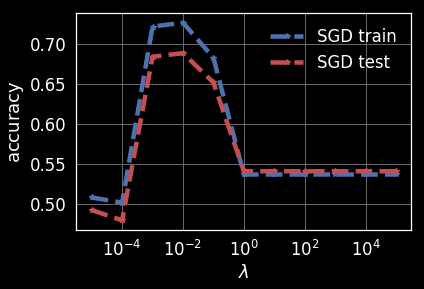

In [8]:
# plot accuracy against regularisation strength
plt.semilogx(lmbdas,train_accuracy_SGD,'*--b',label='SGD train')
plt.semilogx(lmbdas,test_accuracy_SGD,'*--r',label='SGD test')

plt.xlabel('$\\lambda$')
plt.ylabel('$\\mathrm{accuracy}$')

#plt.grid()
plt.legend()


plt.show()

In [11]:
# My class


lr2 = LogisticRegressionC(X_train,Y_train)
lr2.createDesignMatrix()
#lr2.gradientDescent(iterations=100,tolerance = 1e-20, eta=0.1)
#lr2.stochasticGradientDescent( tolerance = 1e-8, n_epochs=100,t0=5, t1 = 50,\
 #                                m = 200)
beta, cost, betaBest = lr2.stochasticGradientDescent2(nEpochs=50, batchSize=20,t0=5, t1 = 25)

#lr2.predict()

myPredictHardTrain = lr2.predictHard(X_train)
accuracyMyModelTrain = (myPredictHardTrain == Y_train).mean()
print('Accuracy my model, own accuracy score, train', accuracyMyModelTrain)
myPredictHardTest = lr2.predictHard(X_test)
accuracyMyModelTest = (myPredictHardTest == Y_test).mean()
print('Accuracy my model, own accuracy score, test', accuracyMyModelTest)


from sklearn.metrics import accuracy_score
print('My class Accuracy train: ', accuracy_score(Y_train, myPredictHardTrain))
print('My class Accuracy test: ', accuracy_score(Y_test, myPredictHardTest))


/home/k/.local/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in exp
/home/k/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


Accuracy my model, own accuracy score, train 0.7301384615384615
Accuracy my model, own accuracy score, test 0.6907230769230769
My class Accuracy train:  0.7301384615384615
My class Accuracy test:  0.6907230769230769


In [6]:
print(np.shape(np.where( myPredictHardTest == 1 )))
print(np.shape(np.where( myPredictHardTrain == 1 )))

print(np.shape(np.where( myPredictHardTest == 0 )))
print(np.shape(np.where( myPredictHardTrain == 0 )))

print(cost)

(1, 31104)
(1, 30451)
(1, 23896)
(1, 24549)
[           inf 61481.72948097 46904.36134056 37531.24036359
 30931.9725211  26141.93903573 22503.51188659 19662.76512093
 17426.03108794 15602.8912369  14121.40931037 12872.80048978
 11827.84595632 10947.44912588 10176.42266691  9523.03497517
  8957.78549732  8451.08255233  7998.88957467  7611.91515866
  7253.24500021  6936.67929985  6652.47741015  6387.89603182
  6152.20018277  5936.05429316  5733.97346534  5552.81210285
  5384.11128239  5228.70686822  5082.96813402  4946.2348385
  4821.7611087   4704.24469571  4595.60711496  4492.62172265
  4393.95154304  4302.2102345   4217.63067347  4136.296831
  4059.02408609  3985.13119473  3916.33617254  3849.59787469
  3788.08110338  3728.20785107  3671.86782165  3616.83410043
  3564.20484066  3513.2577372 ]


In [ ]:
R=25
lr2 = LogisticRegressionC(data, labels)
lr2.createDesignMatrix()
mseUnknownF, sdUnknownF, bias2UnknownF, totalUnknownF = lr2.bootstrap(data, labels, R)